# Setup

Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
project_path = ('/content/gdrive/My Drive/DATA_690_NLP/Text_Summarization/')
sys.path.append(project_path)

Mounted at /content/gdrive/


Import packages

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns
sns.set()
% matplotlib inline
np.random.seed(42)

Load articles

In [3]:
articles_df = pd.read_csv(f'{project_path}Data/processed/Clean_Lemma_LongForm_Telehealth.csv')
articles_df.head()

,Journal Title,Article Title,Date Published,Authors,Abstract,Keywords,Citation,Content,Content_Length,Abstract_Length,Parsed_Keywords,Parsed_Keywords_Length,Subfield,et_al_Count,Clean_Content,Clean_Content_length,Clean_Content_Lemma,Clean_Content_Lemma_LongForm,Classification
0,Psychological Services,The Effectiveness of Telepsychology With Veter...,2021,Michael J. McClellan; Richard Osbaldiston; Ron...,Veterans face a variety of stressors due to th...,"KEYWORDS:\r\n\r\ntelepsychology, meta-analysis...","McClellan, M. J., Osbaldiston, R., Wu, R., Yea...",Veterans face a variety of stressors related t...,37477,2411,"['telepsychology,', 'meta-analysis,', 'veteran...",5,Clinical & Counseling Psychology,50,Veterans face a variety of stressors related t...,36423,veteran face a variety of stressor relate to t...,veteran face a variety of stressor relate to t...,Covid
1,"Psychology, Public Policy, and Law",Making the Case for Videoconferencing and Remo...,2021,Milfred D. Dale; Desiree Smith,The COVID-19 pandemic and its requirements for...,KEYWORDS:\r\n\r\nremote child custody evaluati...,"Dale, M. D., & Smith, D. (2021). Making the ca...",The impact of the COVID-19 pandemic on the chi...,74025,1577,"['remote', 'child', 'custody', 'evaluations,',...",10,Forensic Psychology,48,The impact of the COVID-19 pandemic on the chi...,72009,the impact of the covid-19 pandemic on the chi...,the impact of the covid-19 pandemic on the chi...,Covid
2,"Psychology, Public Policy, and Law","Forensic E-Mental Health: Review, Research Pri...",2021,Lauren E. Kois; Jennifer Cox; Ashley T. Peck,Forensic e-mental health is an area of psychol...,"KEYWORDS:\r\n\r\nforensic e-mental health, tel...","Kois, L. E., Cox, J., & Peck, A. T. (2021). Fo...","In November 2019, COVID-19—the infectious, hig...",63568,1842,"['forensic', 'e-mental', 'health,', 'telehealt...",8,Forensic Psychology,128,In November 2019 COVID-19—the infectious highl...,61640,"in November 2019 , covid-19 — the infectious ,...","in November 2019 , covid-19 — the infectious ,...",Covid
3,Training and Education in Professional Psychology,Moving Toward a New Era of Telepsychology in U...,2021,Allison L. Baier; Sarah Danzo,Many university training clinics are facing nu...,"KEYWORDS:\r\n\r\neducation and training, telep...","Baier, A. L., & Danzo, S. (2021). Moving towar...",Anxiety and depressive disorders are among the...,30147,1650,"['education', 'and', 'training,', 'telepsychol...",6,Clinical & Counseling Psychology,21,Anxiety and depressive disorders are among the...,29392,anxiety and depressive disorder be among the m...,anxiety and depressive disorder be among the m...,Covid
4,Practice Innovations,Navigating Changes in the Physical and Psychol...,2021,Liat Shklarski; Allison Abrams; Elana Bakst,The emergence of the Covid-19 pandemic at the ...,"KEYWORDS:\r\n\r\nremote psychotherapy, Covid-1...","Shklarski, L., Abrams, A., & Bakst, E. (2021)....","In mid-March, 2020, the authors—as well as the...",42367,1871,"['remote', 'psychotherapy,', 'Covid-19,', 'pan...",6,Clinical & Counseling Psychology,14,In mid-March 2020 the authors—as well as the m...,41383,"in mid - March , 2020 , the author — as well a...","in mid - March , 2020 , the author — as well a...",Covid


Load clustering analysis

In [4]:
clustering_df = pd.read_csv(f'{project_path}/Data/clustering_results.csv')
clustering_df.head()

,Unnamed: 0,year,class,cleaned_pca_component_1,cleaned_pca_component_2,cleaned_pca_dbscan_class,cleaned_tsne_dim_1,cleaned_tsne_dim_2,cleaned_tsne_dbscan_class,lemma_pca_component_1,lemma_pca_component_2,lemma_pca_dbscan_class,lemma_tsne_dim_1,lemma_tsne_dim_2,lemma_tsne_dbscan_class,lemma_lg_pca_component_1,lemma_lg_pca_component_2,lemma_lg_pca_dbscan_class,lemma_lg_tsne_dim_1,lemma_lg_tsne_dim_2,lemma_lg_tsne_dbscan_class
0,0,2021,post-pandemic,-1.293127,-0.298761,1,-105.382400,-37.885130,0,-0.925309,0.570252,-1,-100.861565,73.061370,0,-1.001764,-0.396886,-1,-122.160820,64.960600,0
1,1,2021,post-pandemic,0.015101,-0.601342,0,-14.273545,12.252538,0,0.198831,0.661417,0,-27.948496,64.972150,0,-0.088505,-0.604461,0,-105.672020,-34.495900,0
2,2,2021,post-pandemic,-0.076689,0.107492,0,-38.537490,22.823360,0,-0.220643,-0.036627,0,-55.747524,86.805900,0,-0.233274,0.020758,0,21.835712,-91.429110,0
3,3,2021,post-pandemic,0.660822,0.136762,0,19.637897,86.542240,1,0.509964,-0.299466,-1,64.411170,4.263210,1,0.524425,0.195310,1,94.075780,68.172780,1
4,4,2021,post-pandemic,-0.378346,-0.629508,0,-21.101246,-126.837970,0,0.129545,0.407668,0,-9.828983,3.610377,0,0.099840,-0.565733,0,-184.803000,20.938269,-1


# Adding polarity and subjectivity values

In [5]:
clustering_df['Polarity'] = articles_df['Clean_Content_Lemma_LongForm'].apply(lambda x: TextBlob(x).sentiment.polarity)
clustering_df['Subjectivity'] = articles_df['Clean_Content_Lemma_LongForm'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
clustering_df.head()

,Unnamed: 0,year,class,cleaned_pca_component_1,cleaned_pca_component_2,cleaned_pca_dbscan_class,cleaned_tsne_dim_1,cleaned_tsne_dim_2,cleaned_tsne_dbscan_class,lemma_pca_component_1,lemma_pca_component_2,lemma_pca_dbscan_class,lemma_tsne_dim_1,lemma_tsne_dim_2,lemma_tsne_dbscan_class,lemma_lg_pca_component_1,lemma_lg_pca_component_2,lemma_lg_pca_dbscan_class,lemma_lg_tsne_dim_1,lemma_lg_tsne_dim_2,lemma_lg_tsne_dbscan_class,Polarity,Subjectivity
0,0,2021,post-pandemic,-1.293127,-0.298761,1,-105.382400,-37.885130,0,-0.925309,0.570252,-1,-100.861565,73.061370,0,-1.001764,-0.396886,-1,-122.160820,64.960600,0,0.052444,0.391682
1,1,2021,post-pandemic,0.015101,-0.601342,0,-14.273545,12.252538,0,0.198831,0.661417,0,-27.948496,64.972150,0,-0.088505,-0.604461,0,-105.672020,-34.495900,0,0.081330,0.432419
2,2,2021,post-pandemic,-0.076689,0.107492,0,-38.537490,22.823360,0,-0.220643,-0.036627,0,-55.747524,86.805900,0,-0.233274,0.020758,0,21.835712,-91.429110,0,0.022358,0.377100
3,3,2021,post-pandemic,0.660822,0.136762,0,19.637897,86.542240,1,0.509964,-0.299466,-1,64.411170,4.263210,1,0.524425,0.195310,1,94.075780,68.172780,1,0.088945,0.459196
4,4,2021,post-pandemic,-0.378346,-0.629508,0,-21.101246,-126.837970,0,0.129545,0.407668,0,-9.828983,3.610377,0,0.099840,-0.565733,0,-184.803000,20.938269,-1,0.102990,0.472473


Save data

In [10]:
clustering_df['Journal Title'] = articles_df['Journal Title']
clustering_df['Article Title'] = articles_df['Article Title']
clustering_df['Abstract'] = articles_df['Abstract']
clustering_df['Keywords'] = articles_df['Keywords']
clustering_df['Content_Length'] = articles_df['Content_Length']
clustering_df.to_csv(f'{project_path}/Data/clustering_results.csv')
clustering_df.head()

,Unnamed: 0,year,class,cleaned_pca_component_1,cleaned_pca_component_2,cleaned_pca_dbscan_class,cleaned_tsne_dim_1,cleaned_tsne_dim_2,cleaned_tsne_dbscan_class,lemma_pca_component_1,lemma_pca_component_2,lemma_pca_dbscan_class,lemma_tsne_dim_1,lemma_tsne_dim_2,lemma_tsne_dbscan_class,lemma_lg_pca_component_1,lemma_lg_pca_component_2,lemma_lg_pca_dbscan_class,lemma_lg_tsne_dim_1,lemma_lg_tsne_dim_2,lemma_lg_tsne_dbscan_class,Polarity,Subjectivity,Journal Title,Article Title,Abstract,Keywords,Content_Length
0,0,2021,post-pandemic,-1.293127,-0.298761,1,-105.382400,-37.885130,0,-0.925309,0.570252,-1,-100.861565,73.061370,0,-1.001764,-0.396886,-1,-122.160820,64.960600,0,0.052444,0.391682,Psychological Services,The Effectiveness of Telepsychology With Veter...,Veterans face a variety of stressors due to th...,"KEYWORDS:\r\n\r\ntelepsychology, meta-analysis...",37477
1,1,2021,post-pandemic,0.015101,-0.601342,0,-14.273545,12.252538,0,0.198831,0.661417,0,-27.948496,64.972150,0,-0.088505,-0.604461,0,-105.672020,-34.495900,0,0.081330,0.432419,"Psychology, Public Policy, and Law",Making the Case for Videoconferencing and Remo...,The COVID-19 pandemic and its requirements for...,KEYWORDS:\r\n\r\nremote child custody evaluati...,74025
2,2,2021,post-pandemic,-0.076689,0.107492,0,-38.537490,22.823360,0,-0.220643,-0.036627,0,-55.747524,86.805900,0,-0.233274,0.020758,0,21.835712,-91.429110,0,0.022358,0.377100,"Psychology, Public Policy, and Law","Forensic E-Mental Health: Review, Research Pri...",Forensic e-mental health is an area of psychol...,"KEYWORDS:\r\n\r\nforensic e-mental health, tel...",63568
3,3,2021,post-pandemic,0.660822,0.136762,0,19.637897,86.542240,1,0.509964,-0.299466,-1,64.411170,4.263210,1,0.524425,0.195310,1,94.075780,68.172780,1,0.088945,0.459196,Training and Education in Professional Psychology,Moving Toward a New Era of Telepsychology in U...,Many university training clinics are facing nu...,"KEYWORDS:\r\n\r\neducation and training, telep...",30147
4,4,2021,post-pandemic,-0.378346,-0.629508,0,-21.101246,-126.837970,0,0.129545,0.407668,0,-9.828983,3.610377,0,0.099840,-0.565733,0,-184.803000,20.938269,-1,0.102990,0.472473,Practice Innovations,Navigating Changes in the Physical and Psychol...,The emergence of the Covid-19 pandemic at the ...,"KEYWORDS:\r\n\r\nremote psychotherapy, Covid-1...",42367


# Analysis

Comparing the variance in polarity by cleaned_pca_dbscan_class

In [30]:
cleaned_pca_df = clustering_df[(clustering_df['cleaned_pca_dbscan_class'] != -1)&(clustering_df['cleaned_tsne_dbscan_class'] != -1)][['cleaned_pca_dbscan_class', 'cleaned_tsne_dbscan_class', 'Polarity', 'Subjectivity', 'Content_Length']]
print(cleaned_pca_df['cleaned_pca_dbscan_class'].value_counts())
print(cleaned_pca_df['cleaned_tsne_dbscan_class'].value_counts())

0    20
1     8
2     6
Name: cleaned_pca_dbscan_class, dtype: int64
0    16
1    11
2     7
Name: cleaned_tsne_dbscan_class, dtype: int64


cleaned_pca_dbscan_class
0    20
1     8
2     6
dtype: int64


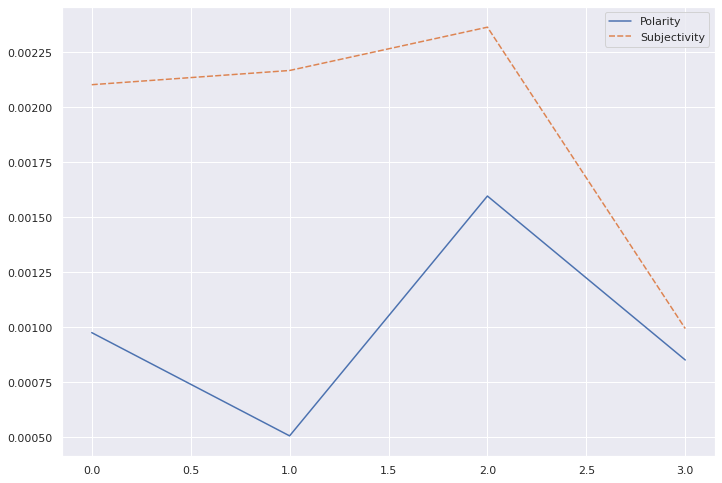

In [58]:
pca_class_var_df = cleaned_pca_df[['Polarity', 'Subjectivity']].var().to_frame().T
pca_class_var_df['Cluster'] = 'Overall'
for db_scan_class, count in cleaned_pca_df['cleaned_pca_dbscan_class'].value_counts().items():
  cluster_df = cleaned_pca_df[cleaned_pca_df['cleaned_pca_dbscan_class'] == db_scan_class]
  cluster_df = cluster_df[['Polarity', 'Subjectivity']].var().to_frame().T
  cluster_df['Cluster'] = db_scan_class
  pca_class_var_df = pd.concat([pca_class_var_df, cluster_df], ignore_index=True)
pca_class_var_df.set_index('Cluster')
print(cleaned_pca_df.value_counts('cleaned_pca_dbscan_class'))
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=pca_class_var_df)

cleaned_tsne_dbscan_class
0    16
1    11
2     7
dtype: int64


ValueError: ignored

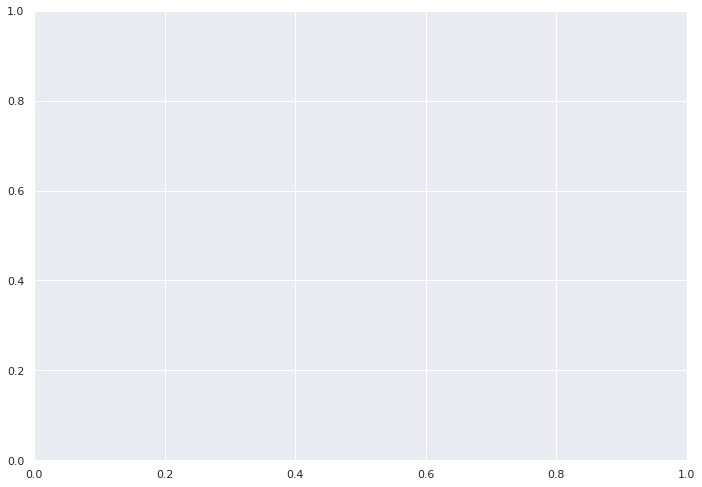

In [62]:
tsne_class_var_df = cleaned_pca_df[['Polarity', 'Subjectivity']].var().to_frame().T
tsne_class_var_df['Cluster'] = 'Overall'
for db_scan_class, count in cleaned_pca_df['cleaned_tsne_dbscan_class'].value_counts().items():
  cluster_df = cleaned_pca_df[cleaned_pca_df['cleaned_tsne_dbscan_class'] == db_scan_class]
  cluster_df = cluster_df[['Polarity', 'Subjectivity']].var().to_frame().T
  cluster_df['Cluster'] = db_scan_class
  tsne_class_var_df = pd.concat([tsne_class_var_df, cluster_df], ignore_index=True)
#tsne_class_var_df.set_index('Cluster')
print(cleaned_pca_df.value_counts('cleaned_tsne_dbscan_class'))
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=tsne_class_var_df, x=['Cluster'])